In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [4]:
DATA = Path("../../data")

In [5]:
train_data = pd.read_csv(DATA / "train_outlier_preprocessing.csv")
test_data = pd.read_csv(DATA / "test_outlier_preprocessing.csv")

In [6]:
train_data.head(50)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,NaN,NaN,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,NaN,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,NaN,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,NaN,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,NaN,n,f,NaN,c,n,5.91,8.20,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,NaN,y,w,f,NaN,c,k,19.07,12.69,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,NaN,e,f,a,NaN,y,8.31,9.77,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,NaN,e,f,NaN,d,w,5.77,17.13,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,NaN,n,f,a,d,w,7.13,12.77,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [8]:
train_data.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                216356
cap-surface             2140345
cap-color                278646
does-bruise-or-bleed        117
gill-attachment         1761702
gill-spacing            1377958
gill-color               120162
stem-height                   0
stem-width                    0
stem-root               2874733
stem-surface            2459940
stem-color               133878
veil-type               2957570
veil-color              2777350
has-ring                    143
ring-type                264805
spore-print-color       2921538
habitat                  120629
season                        0
dtype: int64

In [9]:
train_data[~train_data.isna().any(axis=1)]

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season


In [10]:
null_persent = train_data.isna().mean().sort_values()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'id'),
  Text(1, 0, 'stem-width'),
  Text(2, 0, 'stem-height'),
  Text(3, 0, 'season'),
  Text(4, 0, 'class'),
  Text(5, 0, 'cap-diameter'),
  Text(6, 0, 'does-bruise-or-bleed'),
  Text(7, 0, 'has-ring'),
  Text(8, 0, 'gill-color'),
  Text(9, 0, 'habitat'),
  Text(10, 0, 'stem-color'),
  Text(11, 0, 'cap-shape'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'cap-color'),
  Text(14, 0, 'gill-spacing'),
  Text(15, 0, 'gill-attachment'),
  Text(16, 0, 'cap-surface'),
  Text(17, 0, 'stem-surface'),
  Text(18, 0, 'veil-color'),
  Text(19, 0, 'stem-root'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'veil-type')])

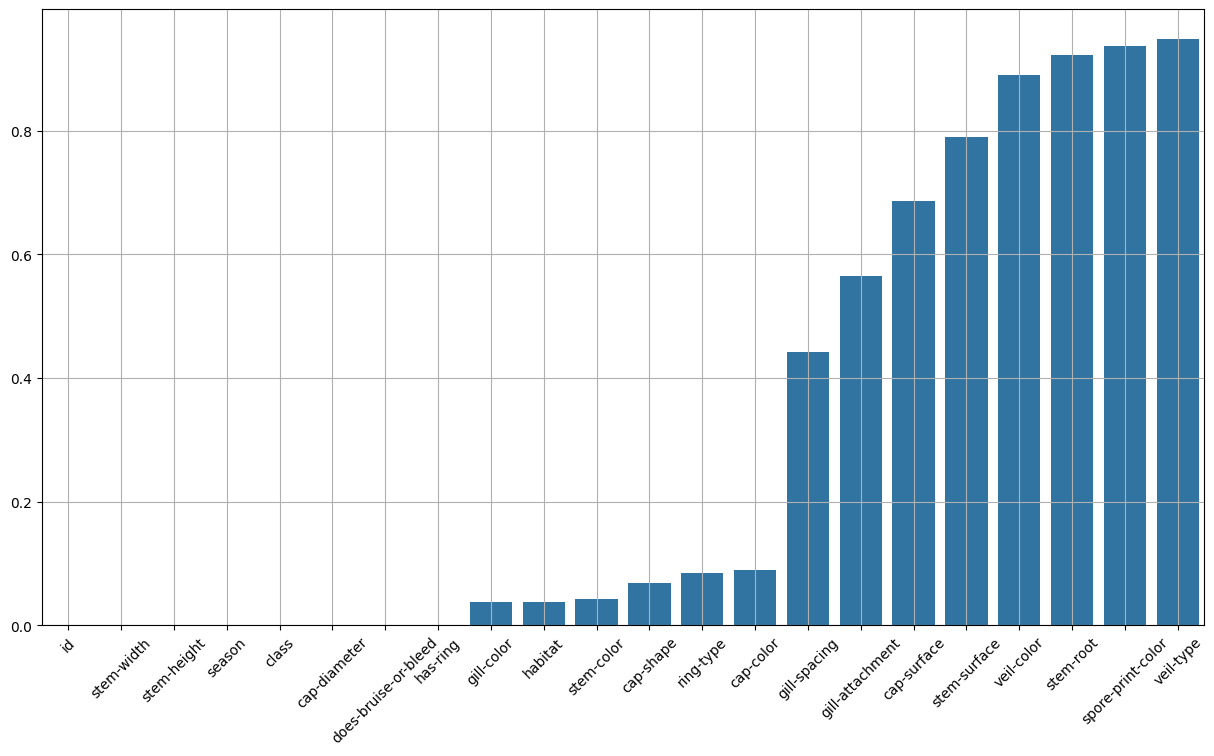

In [60]:
plt.figure(figsize=(15, 8))
sns.barplot(null_persent)
plt.grid(True)
plt.xticks(rotation=45)

In [27]:
def display_number(ax, dtype='float'):
    if dtype == 'float':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{p.get_height():.2f}",
                    ha = 'center')
    elif dtype == 'int':
        for p in ax.patches:
            ax.text(p.get_x() + (p.get_width()/2),
                    p.get_y() + (p.get_height()*1.015),
                    f"{int(p.get_height())}",
                    ha = 'center')

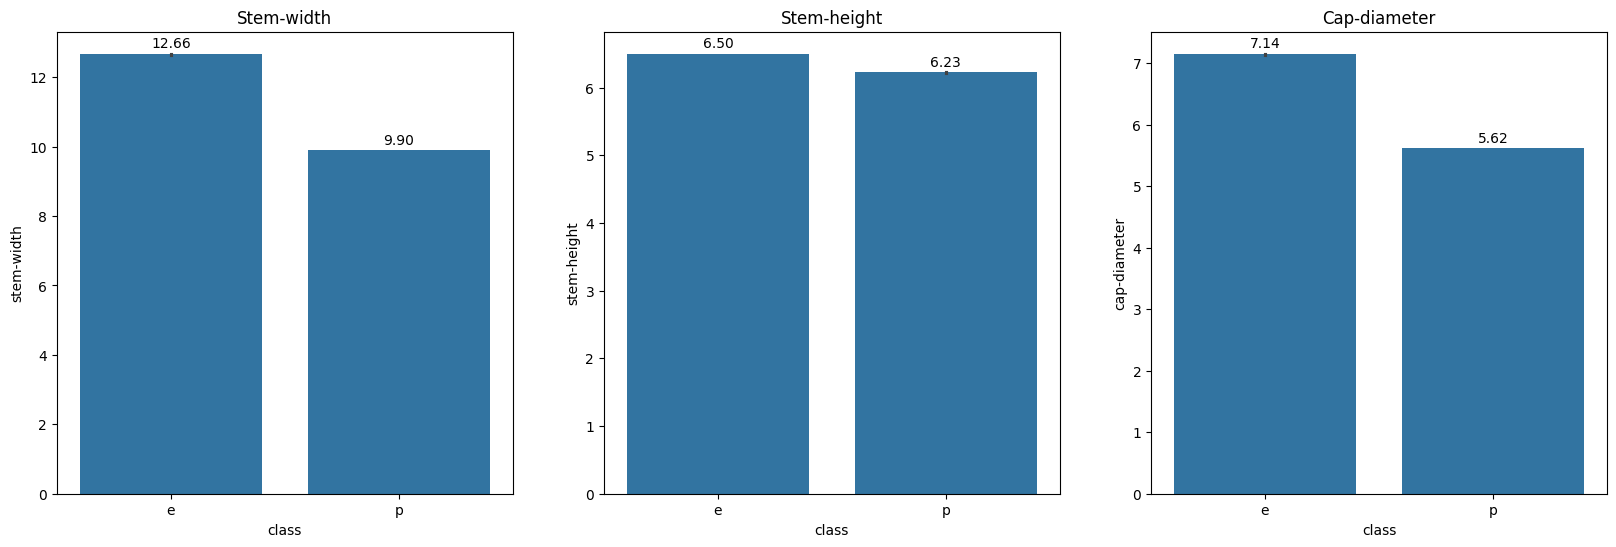

In [46]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
ax1 = sns.barplot(data=train_data, x='class', y='stem-width')
display_number(ax1)
ax1.set_title("Stem-width")

plt.subplot(1, 3, 2)
ax2 = sns.barplot(data=train_data, x='class', y='stem-height')
ax2.set_title("Stem-height")
display_number(ax2)

plt.subplot(1, 3, 3)
ax3 = sns.barplot(data=train_data, x='class', y='cap-diameter')
ax3.set_title("Cap-diameter")
display_number(ax3)

- 평균 stem-width는 e(독이 없는) class보다 p(독이 있는) class가 2.5 정도 더 짧은 경향을 보인다.
- 평균 stem-height는 e(독이 없는) class보다 p(독이 있는) class가 0.3 정도 더 짧은 경향을 보인다.
- 평균 cap-diameter는 e(독이 없는) class보다 p(독이 있는) class가 1.5 정도 더 짧은 경향을 보인다.
- 전체적으로 e(독이 없는) class보다 p(독이 있는) class가 더 작은 경향을 보여준다.

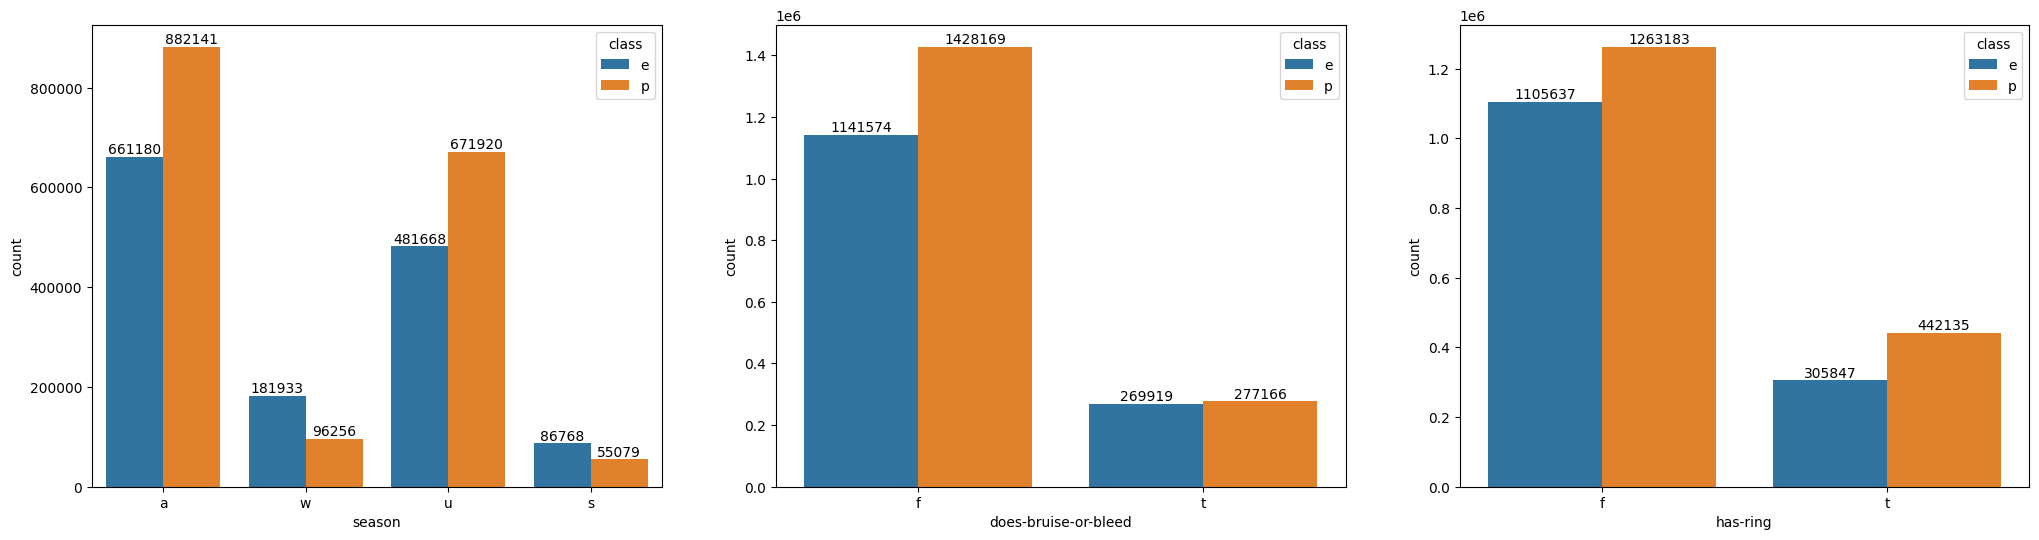

In [62]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
ax4 = sns.countplot(data=train_data, x="season", hue="class")
for p in ax4.containers:
    ax4.bar_label(p)

plt.subplot(1, 3, 2)
ax5 = sns.countplot(data=train_data, x="does-bruise-or-bleed", hue='class')
for p in ax5.containers:
    ax5.bar_label(p, fmt='%d')

plt.subplot(1, 3, 3)
ax6 = sns.countplot(data=train_data, x="has-ring", hue='class')
for p in ax6.containers:
    ax6.bar_label(p, fmt='%d')

#### season
- 전체 데이터는 a(가을)에 가장 많으며 다음으로 u(여름), w(겨울), s(봄) 순으로 많았음 => 의외인게 왜 버섯이 봄에 잘 안나지?, 가을,여름 / 봄, 겨울에서 서로 대조되는 경향을 보임
- u(여름)와 a(가을)에 e(독이 없는) class보다 p(독이 있는) class가 더 많음
- s(봄)와 w(겨울)에는 p(독이 있는) class보다 e(독이 없는) class가 더 많음

#### does-bruise-or-bleed
- 충격을 받았을 때 멍 또는 수액이 나오지 않는 쪽(f)가 나오는 쪽(t)보다 더 많았으며, f일 때 p인 경우가 e인 경우 보다 많았음
- 반면에 t인 경우에는 둘에 큰 차이는 보이지 않았음

#### has-ring
- 줄기에 고리가 있는(t)보다 고리가 없는(f) 경우가 많았음
- 또한 두 경우 모두 e보다 p의 경우가 더 많음

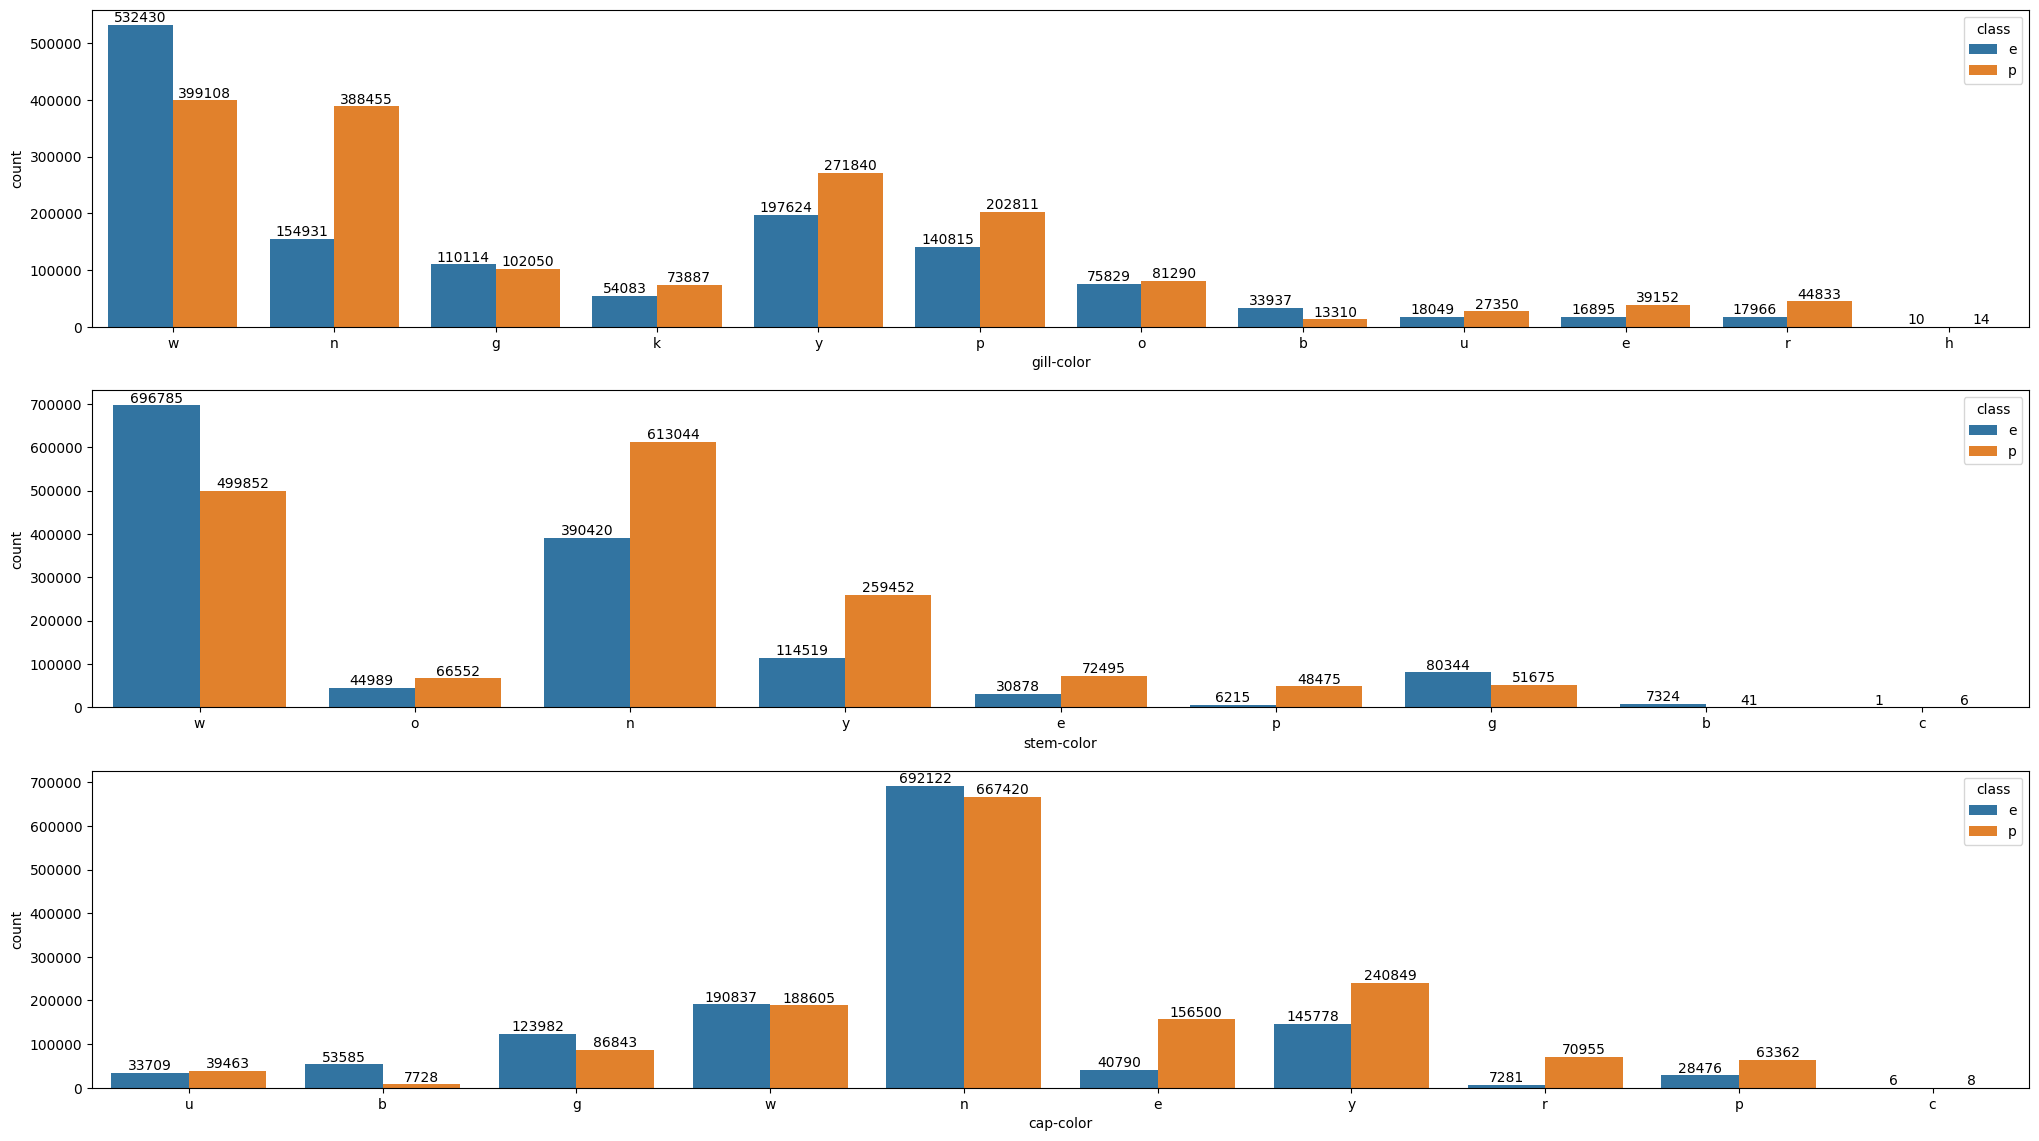

In [73]:
plt.figure(figsize=(25, 14))

plt.subplot(3, 1, 1)
ax7 = sns.countplot(data=train_data, x='gill-color', hue='class')
for p in ax7.containers:
    ax7.bar_label(p)

plt.subplot(3, 1, 2)
ax8 = sns.countplot(data=train_data, x='stem-color', hue='class')
for p in ax8.containers:
    ax8.bar_label(p)

plt.subplot(3, 1, 3)
ax9 = sns.countplot(data=train_data, x='cap-color', hue='class')
for p in ax9.containers:
    ax9.bar_label(p)

- gill-color의 경우 w(흰색), g(회색), b(담황색)를 제외하고는 모두 p인 경우가 많았다.
- stem-color의 경우도 마찬가지로 w, g, b를 제외하고는 모두 p인 경우가 많았다.
- cap-color의 경우는 w, g, b, n(갈색)을 제외하고는 모두 p인 경우가 많았다.

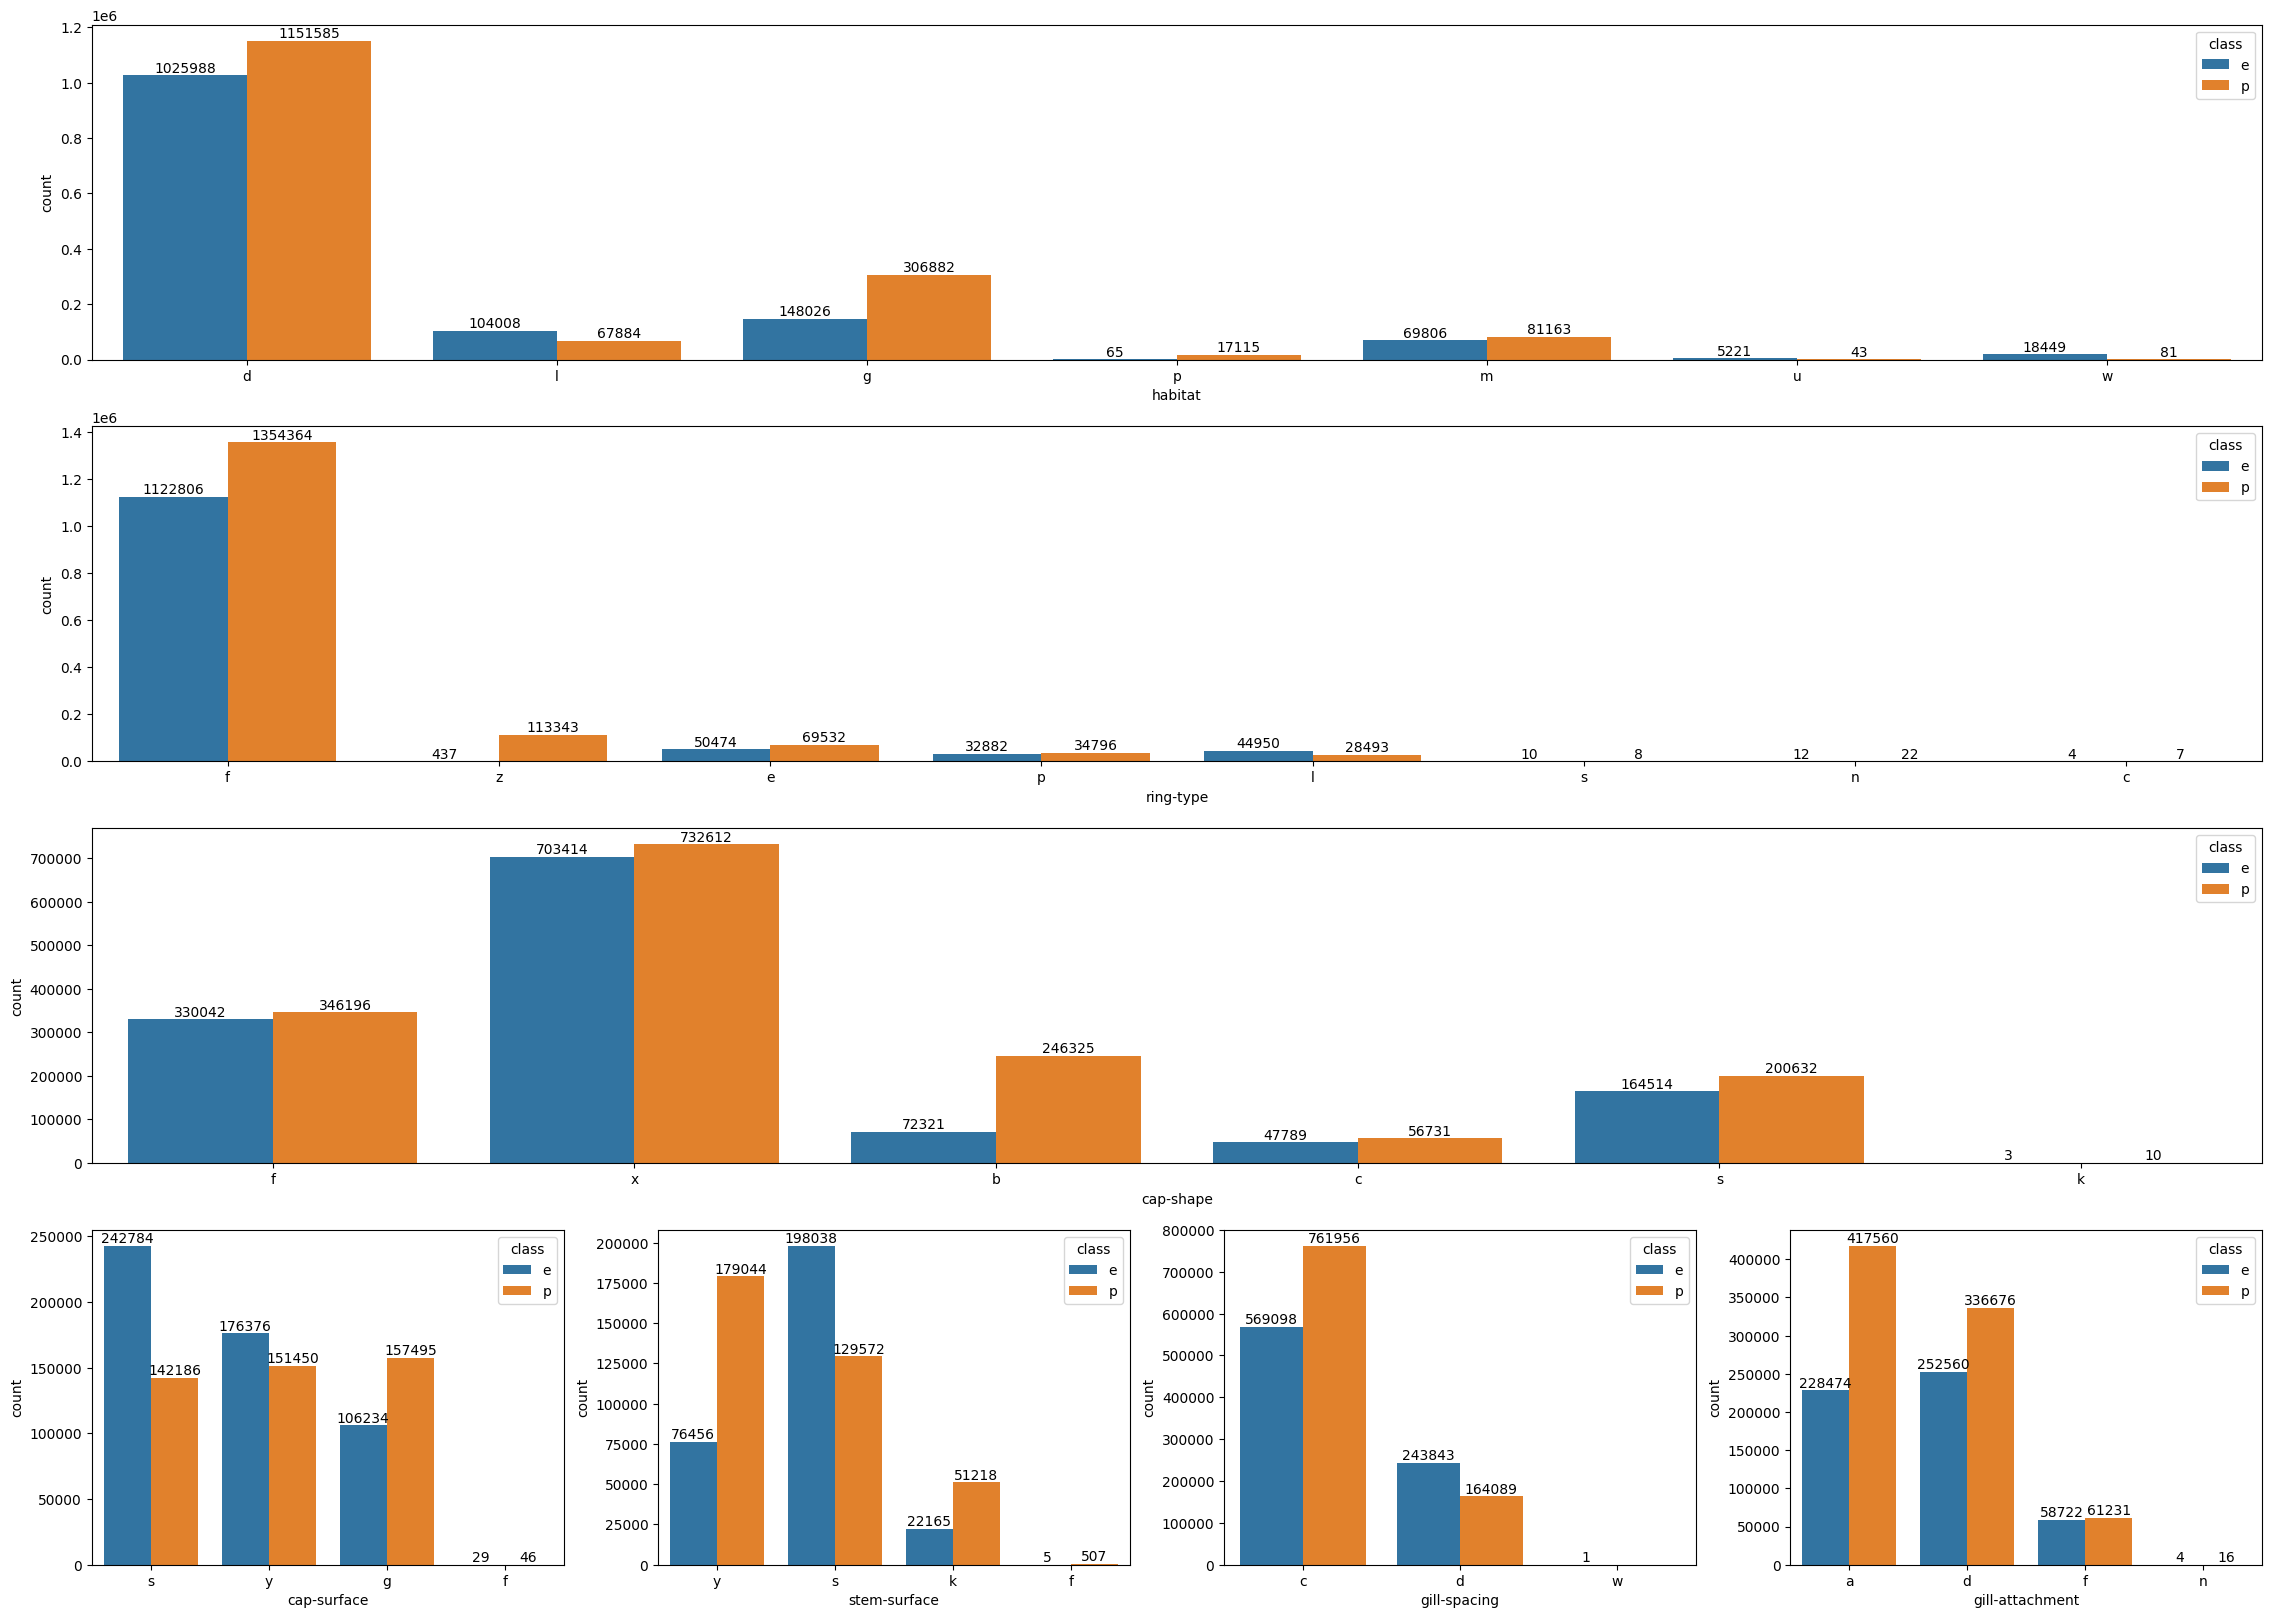

In [90]:
fig = plt.figure(figsize=(28, 20))

ax10 = plt.subplot2grid((4, 4), (0, 0), colspan=4)
sns.countplot(data=train_data, x='habitat', hue='class', ax=ax10)
for p in ax10.containers:
    ax10.bar_label(p, fmt="%d")

ax11 = plt.subplot2grid((4, 4), (1, 0), colspan=4)
sns.countplot(data=train_data, x='ring-type', hue='class', ax=ax11)
for p in ax11.containers:
    ax11.bar_label(p, fmt="%d")
    
ax12 = plt.subplot2grid((4, 4), (2, 0), colspan=4)
sns.countplot(data=train_data, x='cap-shape', hue='class', ax=ax12)
for p in ax12.containers:
    ax12.bar_label(p, fmt="%d")

ax13 = plt.subplot2grid((4, 4), (3, 0))
sns.countplot(data=train_data, x='cap-surface', hue='class', ax=ax13)
for p in ax13.containers:
    ax13.bar_label(p, fmt="%d")

ax14 = plt.subplot2grid((4, 4), (3, 1))
sns.countplot(data=train_data, x='stem-surface', hue='class', ax=ax14)
for p in ax14.containers:
    ax14.bar_label(p, fmt="%d")
    
ax15 = plt.subplot2grid((4, 4), (3, 2))
sns.countplot(data=train_data, x='gill-spacing', hue='class', ax=ax15)
for p in ax15.containers:
    ax15.bar_label(p, fmt="%d")

ax16 = plt.subplot2grid((4, 4), (3, 3))
sns.countplot(data=train_data, x='gill-attachment', hue='class', ax=ax16)
for p in ax16.containers:
    ax16.bar_label(p, fmt="%d")

- habitate의 경우 d(숲)인 경우가 대다수를 차지하였다. 또한 d, g(풀), p(길), m(목초지)에서 p의 class가 많았고 l(잎), u(도시), w(황무지)에서는 e의 class가 많았다. 하지만 여기서 d가 대다수를 차지하고 있으므로 해당 feature가 분류 성능에 영향을 크게 미치지 못할 것으로 예상 된다.
- ring-type 또한 f(펼침)이 대다수를 차지하기 때문에 성능에 큰 영향을 미치지 못할 것으로 예상된다.
- cap-shape의 경우 모든 모양에서 p의 class가 더 많았지만 f(평평함), x(볼록함), c(원뿔모양), s(아래로파임), k(둥글게 돌출)은 e와 p의 차이가 미미하므로 분류 성능에 크게 영향을 미치지 못할 것으로 예상 된다. 또한 k는 적은 표본을 보유하고 있으므로 이 또한 분류 성능에 크게 영향을 미치지 못할 것으로 예상 된다. 마지막으로 b는 e와 p의 뚜렷한 차이를 보이므로 해당 요소가 성능에 충분히 유효한 feature가 될 가능성이 존재한다.
- cap-surface의 경우 f(섬유질)은 매우 적은 수의 표본을 보유하고 있으므로 성능에 큰 영향을 미치지 못할 것으로 보인다. s(매끄러운), y(비늘이 있는)경우는 p보다 e의 경우가 더 많았으며 g(홈이 있는)경우는 p가 더 많은 경우를 보이고 있다. 다만 비율상에서 y의 e와 p는 큰 차이를 보이지 않으므로 성능 향상에 영향이 적을 것으로 예상된다.
- stem-surface의 경우 f(섬유질)은 표본의 수가 적기 때문에 성능에 큰 영향을 미치지 못할 것으로 예상된다. y(비늘이 있는)와 s(매끄러운)는 완전히 다른 양상을 보이고 있고, k(비단질)의 경우 class가 p인 경우가 e인 경우보다 약 2배 가까이 많다.
- gill-spacing의 경우 w(밀집)의 경우는 1건으로 표본의 수가 매우 적다 따라서 성능에 큰 영향을 미치지 못할 것으로 예상된다. c(가깝게)는 p인 경우가 e인 경우보다 확연하게 많은 빈도를 보여준다. 또한 d의 경우 e인 경우가 p인 경우보다 약간 많은 빈도를 보여준다.
- gill-attachment의 경우 n(톱니)는 표본 수가 매우 적으므로 성능에 큰 영향을 끼치지 못할 것으로 예상된다. a(붙음)와 d(내림)는 e보다 p가 더 많은 빈도를 보이며, f(자유)는 거의 동일한 양상을 보인다. 따라서 f는 분류 성능에 큰 영향을 미치지 못할 가능성이 존재한다.